<a href="https://colab.research.google.com/github/BaberFaisal/CouldCredit_Internship_Project_Sales_Forecasting/blob/main/sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Data Preprocessing**

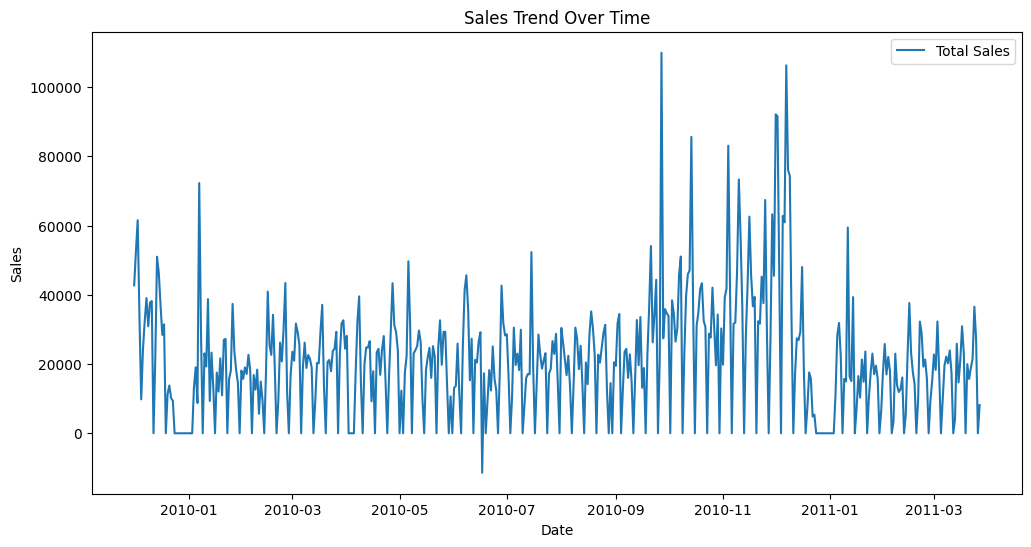

In [ ]:
df.dropna(subset=['Customer ID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSales'] = df['Quantity'] * df['Price']
df = df[['InvoiceDate', 'TotalSales']]
df = df.groupby('InvoiceDate').sum()

df = df.resample('D').sum()

def plot_sales():
    plt.figure(figsize=(12,6))
    plt.plot(df['TotalSales'], label='Total Sales')
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title("Sales Trend Over Time")
    plt.legend()
    plt.show()
plot_sales()


**Train-Test Split**

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

**ARIMA Model**

In [ ]:
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))

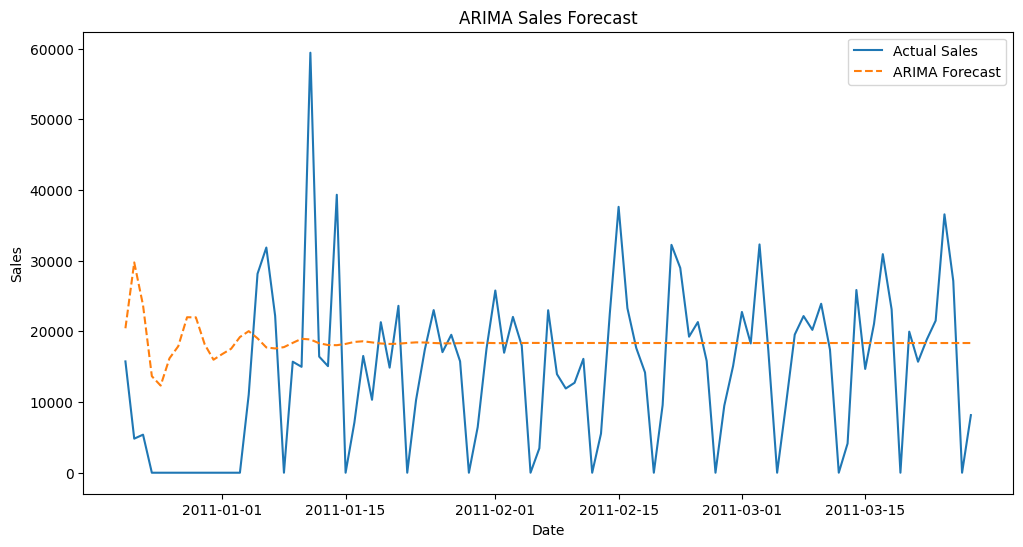

In [ ]:
def plot_forecast(pred, model_name):
    plt.figure(figsize=(12,6))
    plt.plot(test.index, test['TotalSales'], label='Actual Sales')
    plt.plot(test.index, pred, label=f'{model_name} Forecast', linestyle='dashed')
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title(f"{model_name} Sales Forecast")
    plt.legend()
    plt.show()
plot_forecast(arima_pred, "ARIMA")

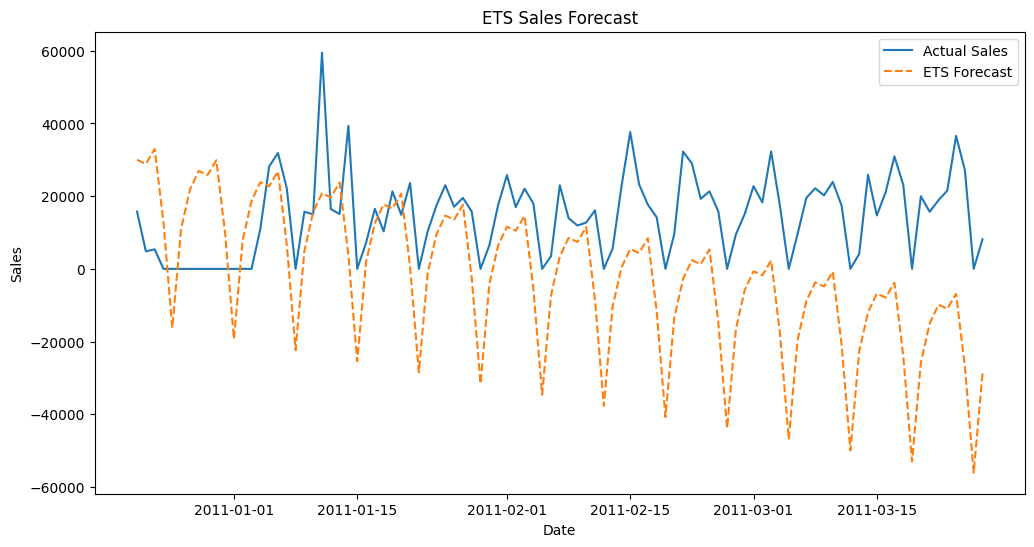

In [ ]:
# Exponential Smoothing Model
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
ets_fit = ets_model.fit()
ets_pred = ets_fit.forecast(steps=len(test))
plot_forecast(ets_pred, "ETS")

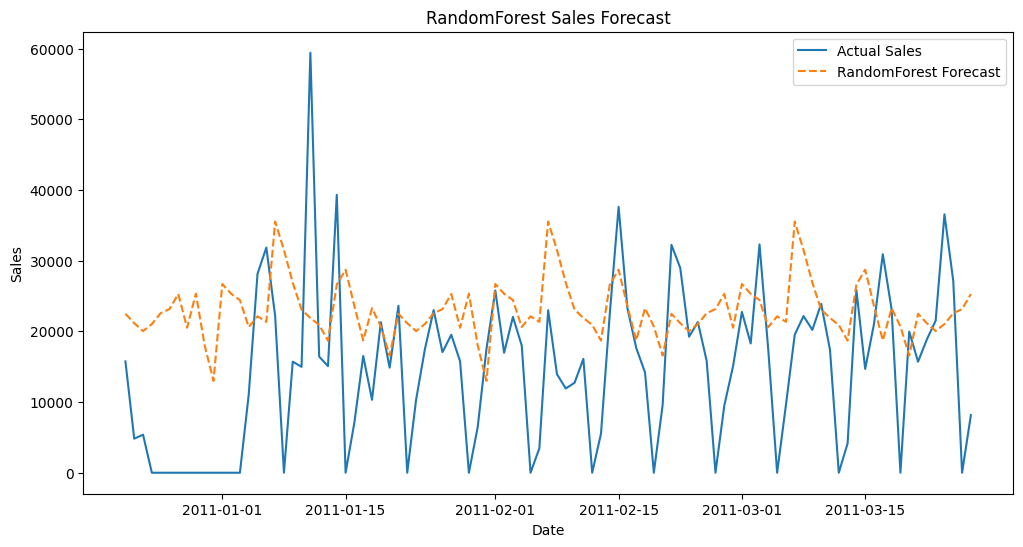

In [ ]:
train['Day'] = train.index.day
test['Day'] = test.index.day
X_train, X_test, y_train, y_test = train[['Day']], test[['Day']], train['TotalSales'], test['TotalSales']
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)
ml_pred = ml_model.predict(X_test)
plot_forecast(ml_pred, "RandomForest")

**Model Evaluation**

In [ ]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
evaluate(test['TotalSales'], arima_pred, "ARIMA")
evaluate(test['TotalSales'], ets_pred, "ETS")
evaluate(test['TotalSales'], ml_pred, "RandomForest")


ARIMA - MAE: 9438.05, RMSE: 12129.76
ETS - MAE: 22504.92, RMSE: 26182.67
RandomForest - MAE: 11468.60, RMSE: 14306.22
